In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\archive\pl-tables-1993-2024.csv")

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None


In [29]:
print(df.head())
print("...\n")
print(df.tail())

   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  
...

     season_end_year               team  position  played  won  drawn  lost  \
641             2024          Brentford        16      38   10      9    19   
642             2024

In [30]:
print(df.describe())

       season_end_year    position      played         won       drawn  \
count       646.000000  646.000000  646.000000  646.000000  646.000000   
mean       2008.365325   10.602167   38.408669   14.283282    9.842105   
std           9.302311    5.840351    1.212411    5.741345    2.956505   
min        1993.000000    1.000000   38.000000    1.000000    2.000000   
25%        2000.000000    6.000000   38.000000   10.000000    8.000000   
50%        2008.000000   11.000000   38.000000   13.000000   10.000000   
75%        2016.000000   16.000000   38.000000   18.000000   12.000000   
max        2024.000000   22.000000   42.000000   32.000000   18.000000   

             lost          gf          ga          gd      points  
count  646.000000  646.000000  646.000000  646.000000  646.000000  
mean    14.283282   51.577399   51.577399    0.000000   52.654799  
std      5.401573   15.195452   13.035291   24.952482   16.499190  
min      0.000000   20.000000   15.000000  -69.000000   11.00

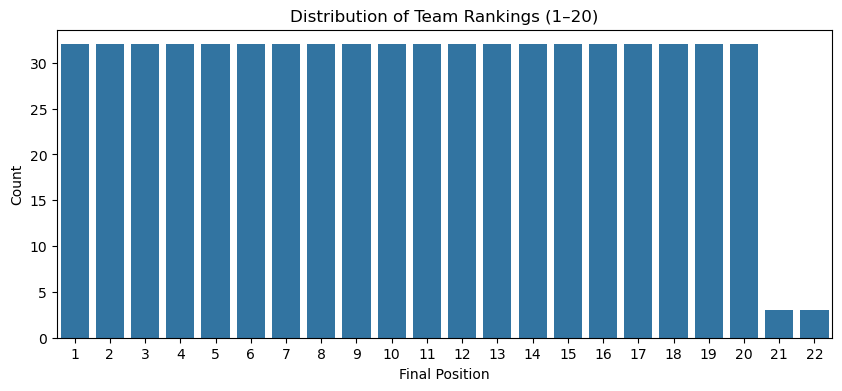

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x="position", data=df)
plt.title("Distribution of Team Rankings (1–20)")
plt.xlabel("Final Position")
plt.ylabel("Count")
plt.show()

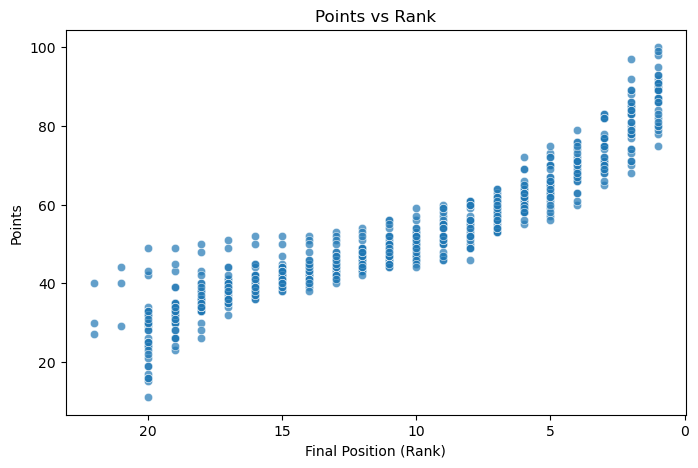

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="position", y="points", data=df, alpha=0.7)
plt.title("Points vs Rank")
plt.xlabel("Final Position (Rank)")
plt.ylabel("Points")
plt.gca().invert_xaxis()
plt.show()

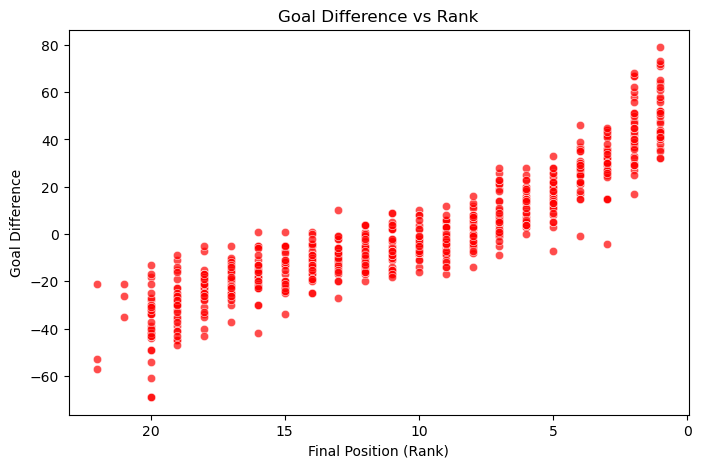

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="position", y="gd", data=df, alpha=0.7, color="red")
plt.title("Goal Difference vs Rank")
plt.xlabel("Final Position (Rank)")
plt.ylabel("Goal Difference")
plt.gca().invert_xaxis()
plt.show()

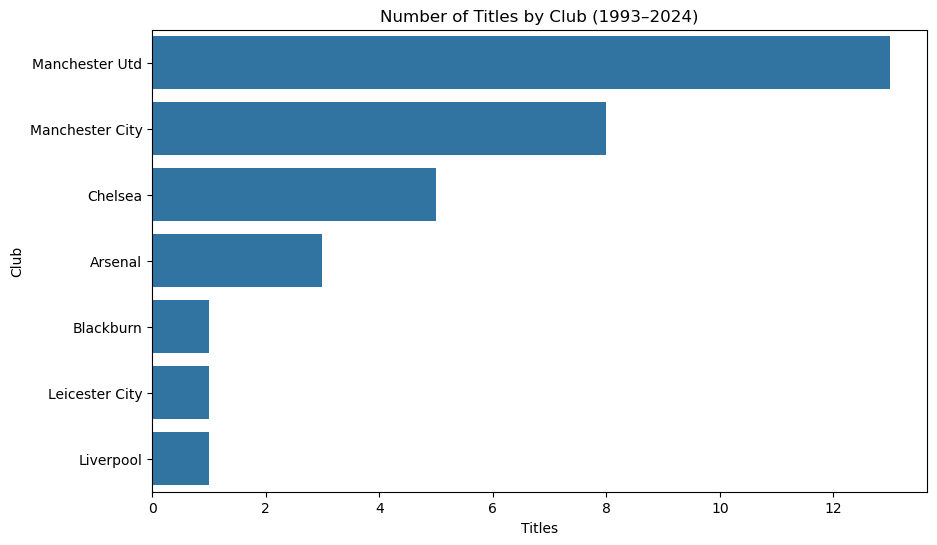

In [34]:
champions = df[df["position"] == 1]

plt.figure(figsize=(10,6))
sns.countplot(y="team", data=champions, order=champions["team"].value_counts().index)
plt.title("Number of Titles by Club (1993–2024)")
plt.xlabel("Titles")
plt.ylabel("Club")
plt.show()

In [35]:
df["league_winner"] = (df["position"] == 1).astype(int)

print("\nNumber of Titles by Club (from league_winner column):")
print(
    df.groupby('team')["league_winner"]
    .sum()
    .sort_values(ascending=False)
)


Number of Titles by Club (from league_winner column):
team
Manchester Utd       13
Manchester City       8
Chelsea               5
Arsenal               3
Liverpool             1
Leicester City        1
Blackburn             1
Barnsley              0
Aston Villa           0
Blackpool             0
Birmingham City       0
Brighton              0
Burnley               0
Cardiff City          0
Charlton Ath          0
Bournemouth           0
Bradford City         0
Brentford             0
Bolton                0
Everton               0
Derby County          0
Crystal Palace        0
Coventry City         0
Ipswich Town          0
Hull City             0
Fulham                0
Huddersfield          0
Luton Town            0
Leeds United          0
Middlesbrough         0
Newcastle Utd         0
Norwich City          0
Nottingham Forest     0
Oldham Athletic       0
Portsmouth            0
QPR                   0
Reading               0
Sheffield Utd         0
Sheffield Weds        0
Sout

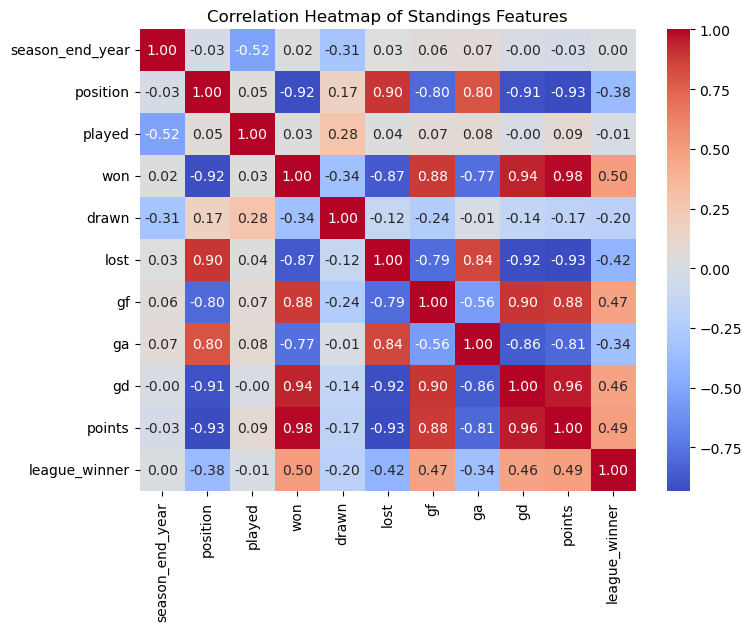

In [36]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Standings Features")
plt.show()
